# Data Science Project : Movie Recommendation System

## Team Members: Ahmad Zeidan , Mosab Abu Laila, Mohammad Hamayel

# Problem and Business Needs:

Problem: We now live in what some call the “era of abundance”. For any given product, there are sometimes thousands of options to choose from. Availability of movies is endless to the point that a person could watch a new movie every waking hour. However, we often end up finding ourselves searching through the movie selection that are available, hoping to find the right movie to fit our interests, if not just to fit our mood. So “What movie should agent watch this evening with respect to his intrest ?” Summrize the problem. 


###### Business Needs:

Recommendation Systems are essential for several reasons and business needs:

1- Recommendation Systems offer personalized suggestions based on user preferences, ensuring that users discover content and products that are relevant and interesting to them.
By providing tailored recommendations, users are more likely to engage with the platform, increasing user satisfaction and retention.
2- In today’s vast digital landscape, recommendation systems help users navigate the overwhelming amount of content available, making it easier to find what they seek.
3-Recommendation systems expose users to new and diverse content, expanding their horizons and introducing them to items they might have overlooked.
4- For complex and subjective choices, such as movies, recommendation systems help users make informed decisions by relying on past behavior and preferences.


# Solution

Develop a Movie Recommendation Service that attempt to lessen the time of browse and selection by providing us movie recommendations immediately after logging into the service. To produce those recommendations, We use data science—specifically machine learning. In Addtion Recommendation Service  expose users to new and diverse content, expanding their horizons and introducing them to items they might have overlooked.A Recommendation System is a filtration program whose prime goal is to predict a user’s “rating” or “preference” towards a domain-specific item or item  by relying on past behavior and preferences. In our case, this domain-specific item is a movie. Therefore the main focus of our recommendation system is to filter and predict only those movies which a user would prefer given some data about the user him or herself.

Gools : To  Build a recommendation engine based on :
1- User Historical  Behaviour 
2- User Similarity Interest
3- Movies Category 

# Business Metrics

###### From a business standpoint, the more relevant products a user finds on the platform, the higher their engagement. This often results in increased revenue for the platform itself. Various sources say that as much as 35–40% of tech giants’ revenue comes from recommendations alone.

Business Metrics:
1- Click-Through Rates:
The click-through rate (CTR) is a metric that measures how many people click on the recommendations. The basic notion is that if more people click on the recommended things, the recommendations are more relevant to them


# Techical Metrics

###### We will leverage the standard ML evaluation metrics to evaluate the recommnedation service predictions that are as follows. 
Precision,Recall,F1-measure,Mean average precision, Mean absolute error and The area under the ROC curve (AUC)


# Movielens Dataset

###### Movie lens dataset consist of 25 million ratings from around 160 thousand users  for 59,000 movies for different genres from Action to Adventure.Database Link:https://grouplens.org/datasets/movielens/


# EDA Questions

###### The EDA will foucse to ansewer below Question

Q1) Trends analysis For Movies and Its Ratings?

A-Identify number of movies made for each genre
B-Number of movies released over the years
C-Change in movie Rating  over the year
D-Identify rating Behavior over the Months and over the years?

Q2) Identify the genres that attracted most users to rate the movies?

Q3) Identify the Ranging Range?

Q4) Identify the Top Rated movies  ?

Q5) Identify the relation between movies Generation over  the year and the ratings behavior over years?

Q6) Identify the most common genre of the movies?

# Import Libraries 

In [75]:
import pandas as pd
import plotly.express as px
import re
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import plotly as py
from datetime import datetime

## Read Dataset Files

In [8]:
movies = pd.read_csv('./ml-25m/movies.csv')
ratings = pd.read_csv('./ml-25m/ratings.csv')


In [9]:

movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [11]:
print(f"Shape : {movies.shape} \nSize  :  {movies.size}")

Shape : (62423, 3) 
Size  :  187269


In [12]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [13]:

movies.duplicated().sum()

0

In [15]:
ratings.head()

userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510

In [16]:

ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [17]:
print(f"Shape : {ratings.shape} \nSize  :  {ratings.size}")

Shape : (25000095, 4) 
Size  :  100000380


In [18]:

ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [19]:

ratings.duplicated().sum()
     

0

In [21]:
#looking for some initial statistics of data
print('No of Users who rated movies:', ratings.userId.nunique())
print('No of Rated Movies:', ratings.movieId.nunique())
print('No of ratings:', ratings.rating.count())


No of Users who rated movies: 162541
No of Rated Movies: 59047
No of ratings: 25000095


In [22]:
movies_df=movies.copy()
ratings_df=ratings.copy()

## Rating Counts per Rating Value

In [78]:
df_rating=ratings.copy()

In [79]:

df_rating["timestamp"] = df_rating["timestamp"].apply(datetime.fromtimestamp)
df_rating['year'] = df_rating['timestamp'].dt.year
df_rating['month'] = df_rating['timestamp'].dt.month
df_rating['time'] = df_rating['timestamp'].dt.time
df_rating['date'] = df_rating['timestamp'].dt.date

/var/folders/19/78tzv11j6j1fvp85jc_fn1640000gn/T/ipykernel_39361/3524717693.py:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



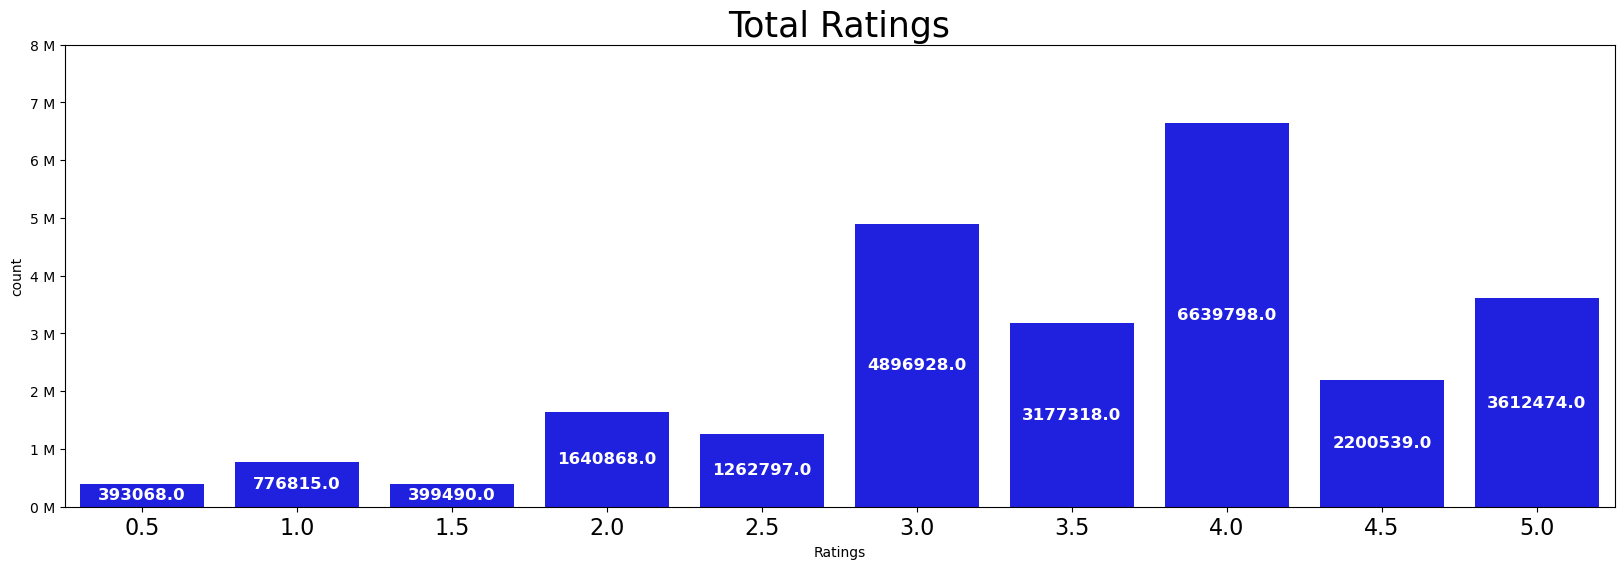

In [82]:

plt.figure(figsize= (20, 6))

ax = sns.countplot(data = df_rating, x ="rating",
            color = 'Blue')
ax.set_ylim(0, 8000000)
ylabels = ['{:.0f}'.format(x) + ' M' for x in ax.get_yticks()/1000000]
ax.set_yticklabels(ylabels)

for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = i.get_height(), 
            ha = 'center', va ='center', size = 12, weight = 'bold', rotation = 0, color = 'white')
    
plt.title('Total Ratings', size= 25)
plt.xlabel("Ratings")
plt.xticks(size= 16)

plt.show()

###### The graph show that the most user has given a rating of movies between 3 to 5

## Find the counts of ratings for each year

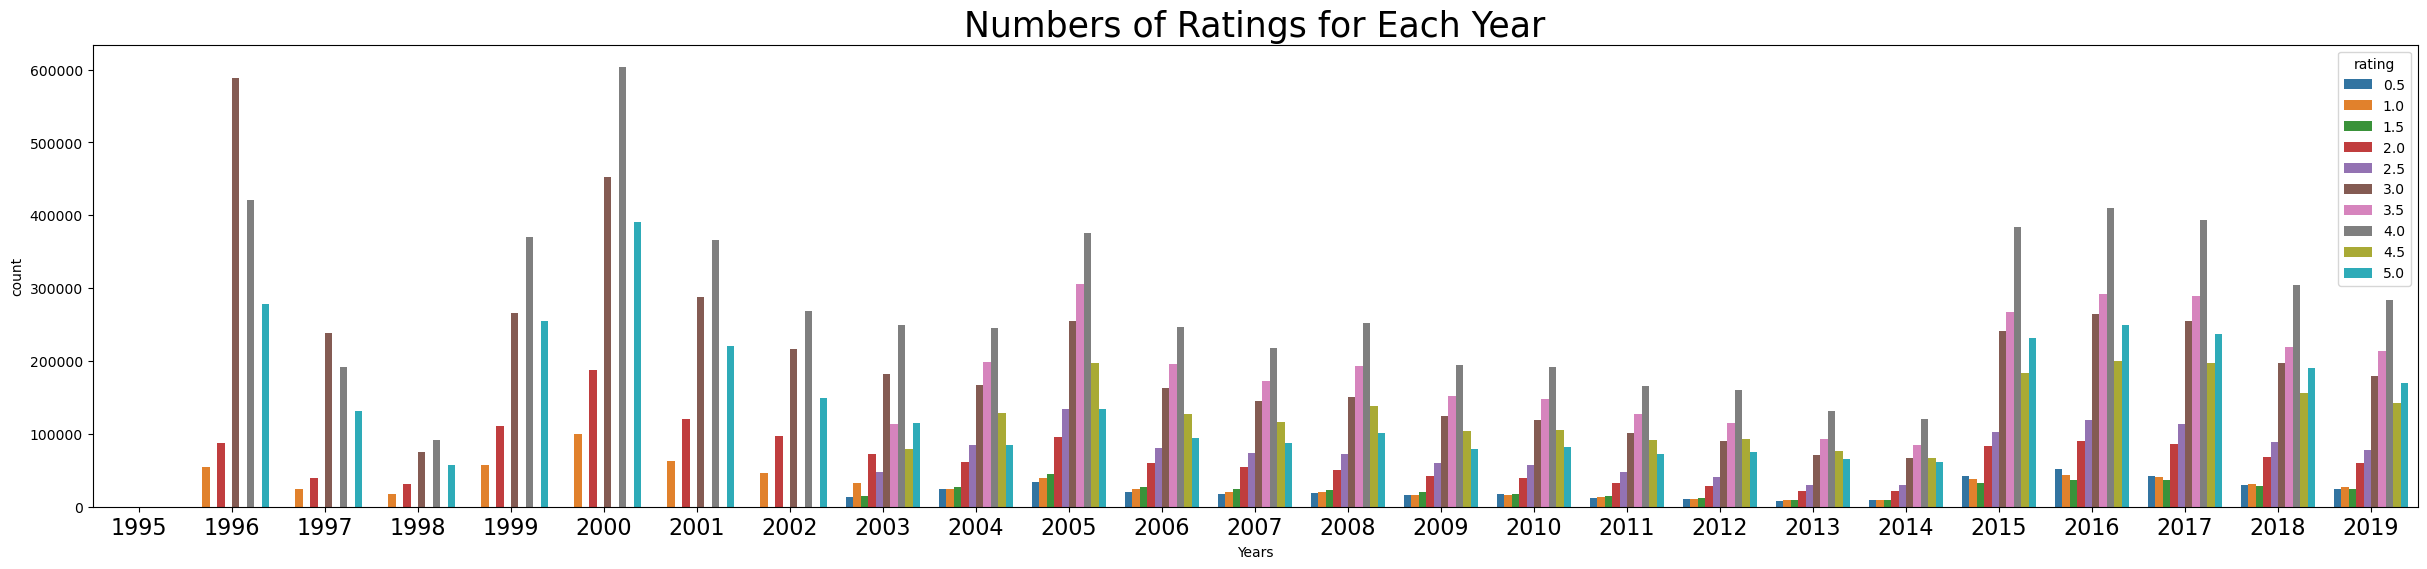

In [86]:

plt.figure(figsize= (30, 6))

sns.countplot(data = df_rating, x=df_rating.year,
              hue= df_rating.rating)

plt.title('Numbers of Ratings for Each Year', size= 25)
plt.xlabel("Years")
plt.xticks(size= 16)

plt.show()

###### The graph show that No rating in 1995 Year, Also we have a difference in rating count between years. In addition graph show that most of rating between 3 to 5

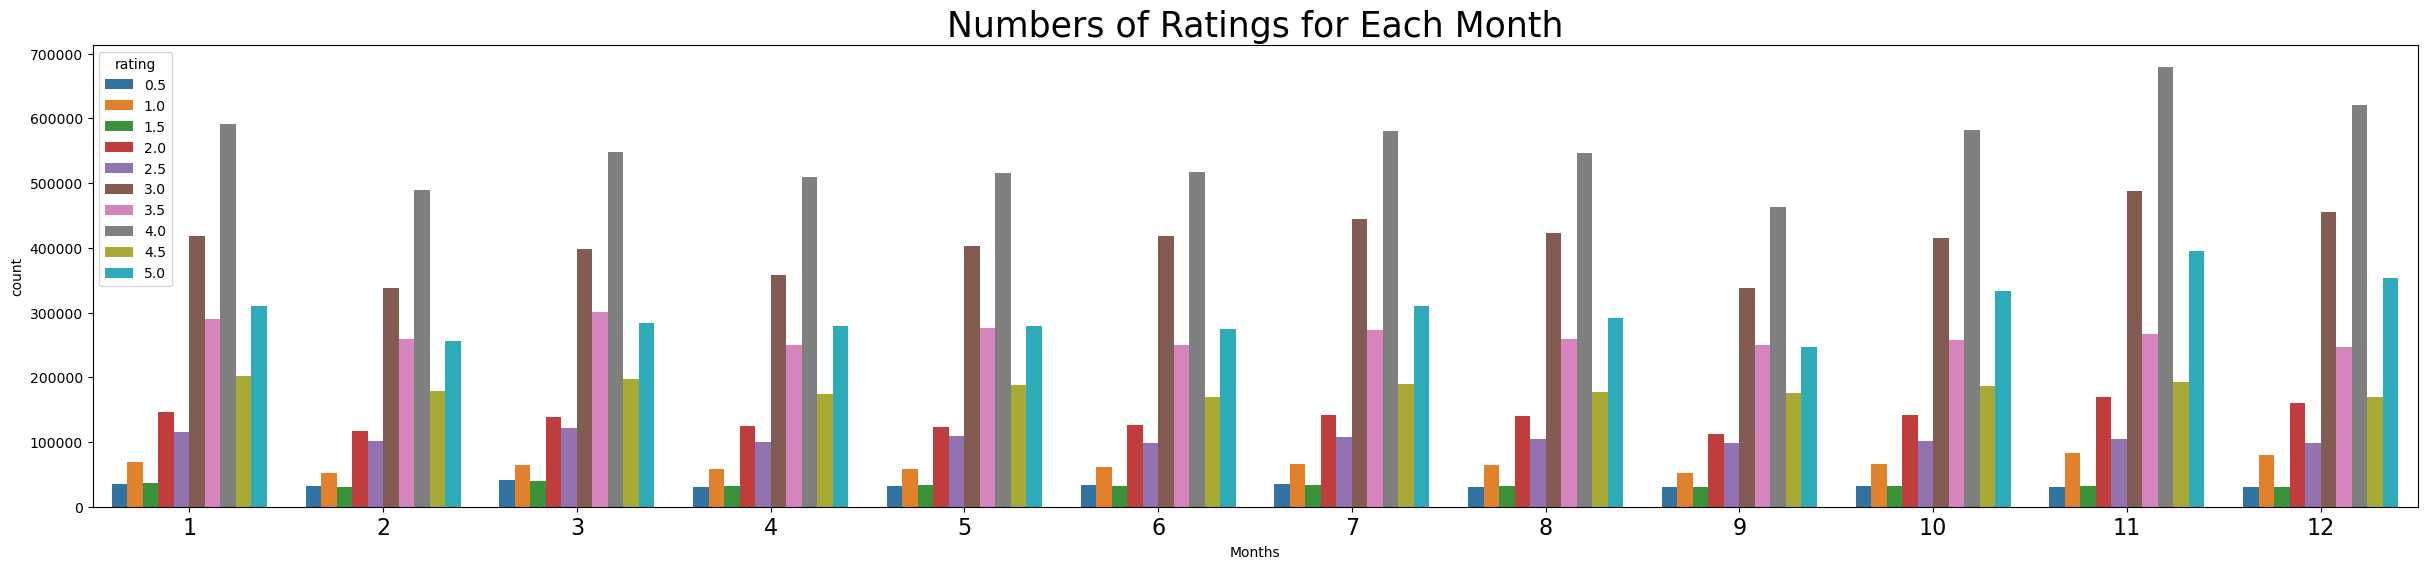

In [87]:

plt.figure(figsize= (30, 6))

sns.countplot(data = df_rating, x=df_rating.month,
              hue= df_rating.rating)

plt.title('Numbers of Ratings for Each Month', size= 25)
plt.xlabel("Months")
plt.xticks(size= 16)
plt.show()
     

###### The graph show that there is a  same rating behavior over months

## Find top 10 users based on counts of ratings.

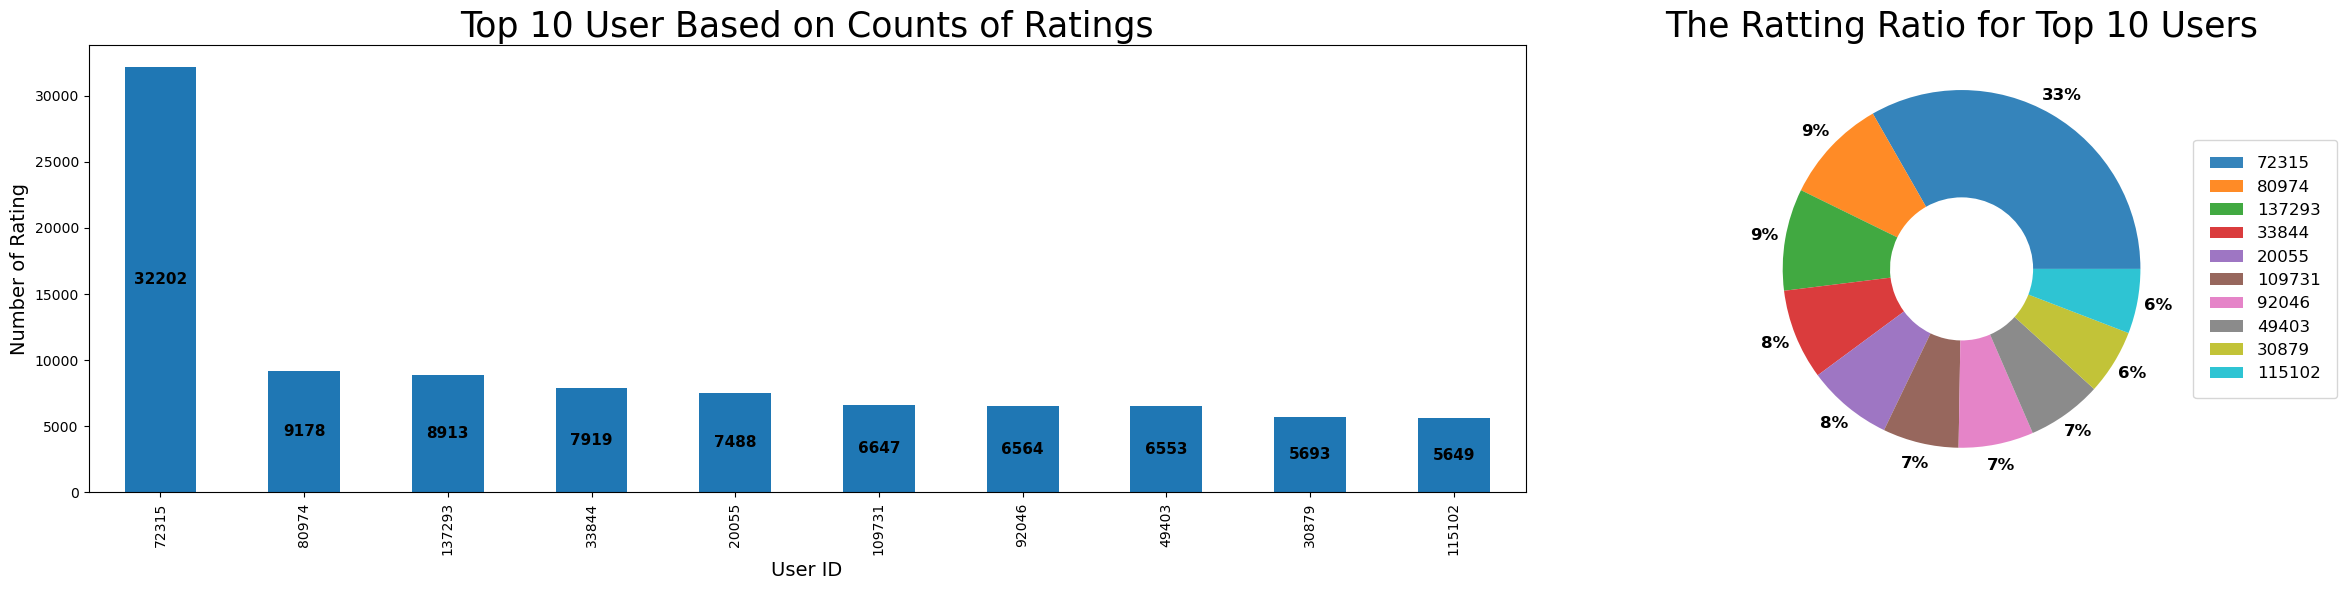

In [89]:
fig, axes = plt.subplots(1,2)


ax = df_rating['userId'].value_counts()[:10].plot.bar(ax= axes[0], figsize=(30,6))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height()/2),
                va="center", ha="center",
                size = 11, weight = 'bold', rotation = 0, color = 'black',
               )

ax.set_xlabel('User ID', fontsize=14)
ax.set_ylabel('Number of Rating', fontsize=14)
axes[0].set_title('Top 10 User Based on Counts of Ratings', size= 25);

df = df_rating['userId'].value_counts()[:10].reset_index().rename(columns={'userId': 'count', 'index': 'userId'})
pie = plt.pie(
    df['count'], 
    wedgeprops=dict(width=0.6, alpha=0.9),
    autopct='%1.0f%%',
    pctdistance=1.12, 
    textprops={
        'fontsize': 12, 
        'fontweight': 'bold'});

axes[1].legend(df['userId'], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), borderpad=1, fontsize=12)
axes[1].set_title('The Ratting Ratio for Top 10 Users', size= 25);

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()

## Genres in Movies

In [24]:
movies_df.head(100)


movieId                                 title  \
0         1                      Toy Story (1995)   
1         2                        Jumanji (1995)   
2         3               Grumpier Old Men (1995)   
3         4              Waiting to Exhale (1995)   
4         5    Father of the Bride Part II (1995)   
..      ...                                   ...   
95       97               Hate (Haine, La) (1995)   
96       98                       Shopping (1994)   
97       99  Heidi Fleiss: Hollywood Madam (1995)   
98      100                      City Hall (1996)   
99      101                  Bottle Rocket (1996)   

                                         genres  
0   Adventure|Animation|Children|Comedy|Fantasy  
1                    Adventure|Children|Fantasy  
2                                Comedy|Romance  
3                          Comedy|Drama|Romance  
4                                        Comedy  
..                                          ...  
95                                  Crime|Drama  
96                              Action|Thriller  
97                                  Documentary  
98                               Drama|Thriller  
99               Adventure|Comedy|Crime|Romance  

[100 rows x 3 columns]

In [25]:
movies_df['genresList'] = movies_df['genres'].apply(lambda x: x.split('|'))
movies_df.head(100)

movieId                                 title  \
0         1                      Toy Story (1995)   
1         2                        Jumanji (1995)   
2         3               Grumpier Old Men (1995)   
3         4              Waiting to Exhale (1995)   
4         5    Father of the Bride Part II (1995)   
..      ...                                   ...   
95       97               Hate (Haine, La) (1995)   
96       98                       Shopping (1994)   
97       99  Heidi Fleiss: Hollywood Madam (1995)   
98      100                      City Hall (1996)   
99      101                  Bottle Rocket (1996)   

                                         genres  \
0   Adventure|Animation|Children|Comedy|Fantasy   
1                    Adventure|Children|Fantasy   
2                                Comedy|Romance   
3                          Comedy|Drama|Romance   
4                                        Comedy   
..                                          ...   
95                                  Crime|Drama   
96                              Action|Thriller   
97                                  Documentary   
98                               Drama|Thriller   
99               Adventure|Comedy|Crime|Romance   

                                           genresList  
0   [Adventure, Animation, Children, Comedy, Fantasy]  
1                      [Adventure, Children, Fantasy]  
2                                   [Comedy, Romance]  
3                            [Comedy, Drama, Romance]  
4                                            [Comedy]  
..                                                ...  
95                                     [Crime, Drama]  
96                                 [Action, Thriller]  
97                                      [Documentary]  
98                                  [Drama, Thriller]  
99                [Adventure, Comedy, Crime, Romance]  

[100 rows x 4 columns]

In [26]:
movies_df_exploded = movies_df.explode('genresList')


In [27]:
movies_df_exploded.head(100)

movieId                   title  \
0         1        Toy Story (1995)   
0         1        Toy Story (1995)   
0         1        Toy Story (1995)   
0         1        Toy Story (1995)   
0         1        Toy Story (1995)   
..      ...                     ...   
40       41      Richard III (1995)   
40       41      Richard III (1995)   
41       42  Dead Presidents (1995)   
41       42  Dead Presidents (1995)   
41       42  Dead Presidents (1995)   

                                         genres genresList  
0   Adventure|Animation|Children|Comedy|Fantasy  Adventure  
0   Adventure|Animation|Children|Comedy|Fantasy  Animation  
0   Adventure|Animation|Children|Comedy|Fantasy   Children  
0   Adventure|Animation|Children|Comedy|Fantasy     Comedy  
0   Adventure|Animation|Children|Comedy|Fantasy    Fantasy  
..                                          ...        ...  
40                                    Drama|War      Drama  
40                                    Drama|War        War  
41                           Action|Crime|Drama     Action  
41                           Action|Crime|Drama      Crime  
41                           Action|Crime|Drama      Drama  

[100 rows x 4 columns]

In [28]:
movies_df_exploded.genresList.unique()

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [29]:
movies_df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112307 entries, 0 to 62422
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   movieId     112307 non-null  int64 
 1   title       112307 non-null  object
 2   genres      112307 non-null  object
 3   genresList  112307 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.3+ MB


In [30]:
movie_count_by_genre = px.histogram(movies_df_exploded, x='genresList', height=400, title='Movie count by genre').update_xaxes(categoryorder="total descending")
movie_count_by_genre

###### The graph show that the number of movies made over the years specific to various genres. Drama , Thriller and Comedy are the most favorite genres for movie makers.

#### Data Cleaning

In [33]:
def cleaningMovieYear(x):
    return (x.str.strip('()'))

In [32]:
movies_df['year'] = movies_df['title'].str.extract('(\(\d{4}\))').apply(cleaningMovieYear)

# converting year string to datetime 'year' values
movies_df['year'] = pd.to_datetime(movies_df['year'] , format='%Y')

movies_df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  \
0  Adventure|Animation|Children|Comedy|Fantasy   
1                   Adventure|Children|Fantasy   
2                               Comedy|Romance   
3                         Comedy|Drama|Romance   
4                                       Comedy   

                                          genresList       year  
0  [Adventure, Animation, Children, Comedy, Fantasy] 1995-01-01  
1                     [Adventure, Children, Fantasy] 1995-01-01  
2                                  [Comedy, Romance] 1995-01-01  
3                           [Comedy, Drama, Romance] 1995-01-01  
4                                           [Comedy] 1995-01-01

In [34]:
# Movies that do not have Year infomration available.
movies_df['year'].isnull().sum()

410

In [35]:
# Dropping such records with no Year informationa on them
movies_df.dropna(subset=['year'] , inplace=True)

# Converting year column from datetime to Year 
movies_df['year'] = movies_df['year'].dt.year

movies_df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  \
0  Adventure|Animation|Children|Comedy|Fantasy   
1                   Adventure|Children|Fantasy   
2                               Comedy|Romance   
3                         Comedy|Drama|Romance   
4                                       Comedy   

                                          genresList  year  
0  [Adventure, Animation, Children, Comedy, Fantasy]  1995  
1                     [Adventure, Children, Fantasy]  1995  
2                                  [Comedy, Romance]  1995  
3                           [Comedy, Drama, Romance]  1995  
4                                           [Comedy]  1995

In [36]:
movies_df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  \
0  Adventure|Animation|Children|Comedy|Fantasy   
1                   Adventure|Children|Fantasy   
2                               Comedy|Romance   
3                         Comedy|Drama|Romance   
4                                       Comedy   

                                          genresList  year  
0  [Adventure, Animation, Children, Comedy, Fantasy]  1995  
1                     [Adventure, Children, Fantasy]  1995  
2                                  [Comedy, Romance]  1995  
3                           [Comedy, Drama, Romance]  1995  
4                                           [Comedy]  1995

In [37]:
movies_df['year'].isnull().sum()

0

In [38]:
# year range
print ( 'min year:' , movies_df['year'].min() , ' |  max year:', movies_df['year'].max())

min year: 1874  |  max year: 2019


<Axes: title={'center': 'Number of movies released per year'}, xlabel='year'>

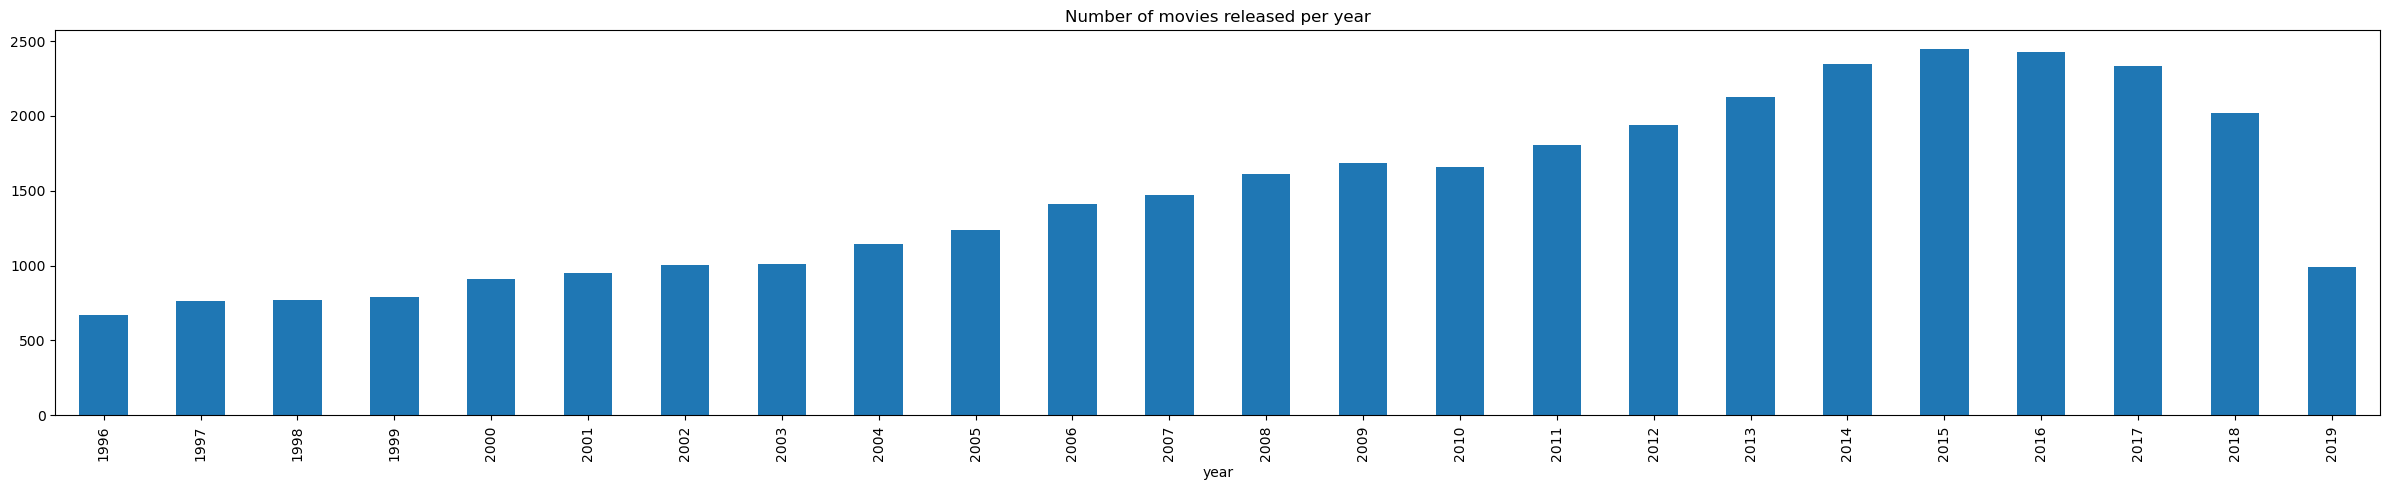

In [66]:

df_temp = movies_df[movies_df['year']>1995].groupby(['year'])['title'].count()
df_temp.plot.bar(x='year', y='movies', title='Number of movies released per year', figsize=(30, 5))

###### The graph show that the number of movies increases over years till 2017 and then start deceasing. 

## Find the number of movies released in last 10 years.

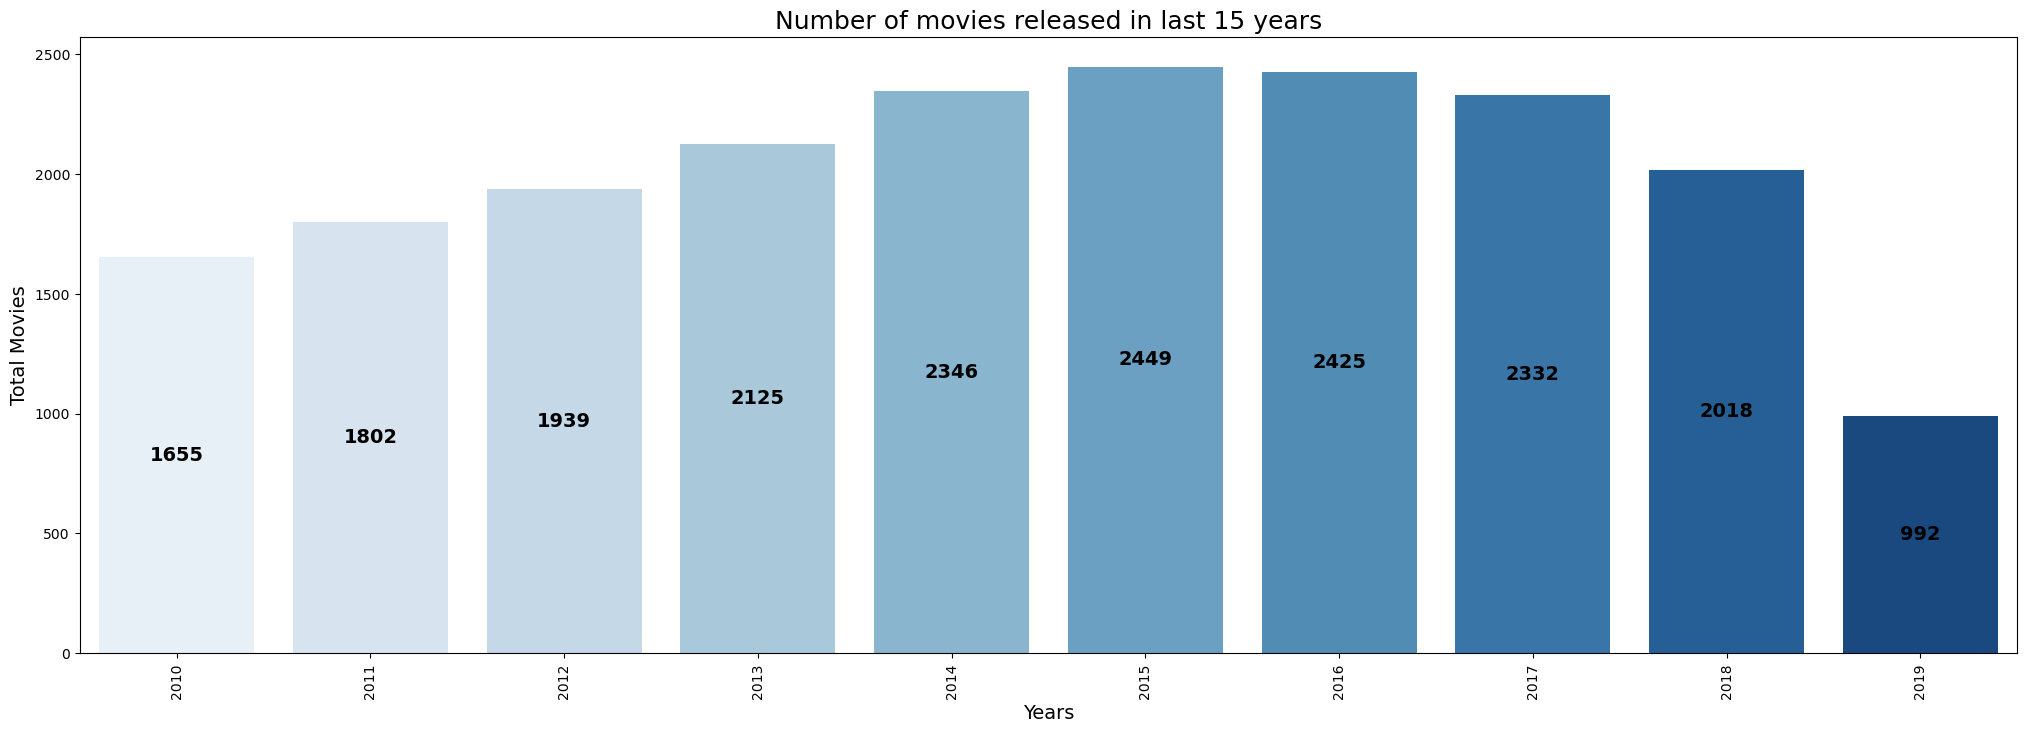

In [74]:
df_temp = movies_df.groupby(['year'])['title'].count().tail(10)
plt.figure(figsize=(25,8))
ax= sns.barplot(x=df_temp.index,y=df_temp.values, data=movies_df,palette='Blues')

for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = int(i.get_height()), 
            ha = 'center', va='center', size = 14, weight = 'bold', rotation = 0, color = 'black',
           )

plt.xlabel('Years',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Total Movies',fontsize=14)
plt.title("Number of movies released in last 15 years", fontsize=18)
plt.show()

In [40]:
movies_df.head(100)

movieId                                 title  \
0         1                      Toy Story (1995)   
1         2                        Jumanji (1995)   
2         3               Grumpier Old Men (1995)   
3         4              Waiting to Exhale (1995)   
4         5    Father of the Bride Part II (1995)   
..      ...                                   ...   
95       97               Hate (Haine, La) (1995)   
96       98                       Shopping (1994)   
97       99  Heidi Fleiss: Hollywood Madam (1995)   
98      100                      City Hall (1996)   
99      101                  Bottle Rocket (1996)   

                                         genres  \
0   Adventure|Animation|Children|Comedy|Fantasy   
1                    Adventure|Children|Fantasy   
2                                Comedy|Romance   
3                          Comedy|Drama|Romance   
4                                        Comedy   
..                                          ...   
95                                  Crime|Drama   
96                              Action|Thriller   
97                                  Documentary   
98                               Drama|Thriller   
99               Adventure|Comedy|Crime|Romance   

                                           genresList  year  
0   [Adventure, Animation, Children, Comedy, Fantasy]  1995  
1                      [Adventure, Children, Fantasy]  1995  
2                                   [Comedy, Romance]  1995  
3                            [Comedy, Drama, Romance]  1995  
4                                            [Comedy]  1995  
..                                                ...   ...  
95                                     [Crime, Drama]  1995  
96                                 [Action, Thriller]  1994  
97                                      [Documentary]  1995  
98                                  [Drama, Thriller]  1996  
99                [Adventure, Comedy, Crime, Romance]  1996  

[100 rows x 5 columns]

In [41]:



ratings_df.head(100)


userId  movieId  rating   timestamp
0        1      296     5.0  1147880044
1        1      306     3.5  1147868817
2        1      307     5.0  1147868828
3        1      665     5.0  1147878820
4        1      899     3.5  1147868510
..     ...      ...     ...         ...
95       2      733     4.5  1141415905
96       2      858     3.5  1141416926
97       2      914     4.0  1141417642
98       2      953     4.5  1141417487
99       2     1035     1.0  1141415899

[100 rows x 4 columns]

In [42]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62013 entries, 0 to 62422
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   movieId     62013 non-null  int64 
 1   title       62013 non-null  object
 2   genres      62013 non-null  object
 3   genresList  62013 non-null  object
 4   year        62013 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.8+ MB


In [43]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


#### Join Movies with their avg ratings

In [45]:
avg_ratings = ratings_df[['movieId' , 'rating']].groupby('movieId').mean().round(2)
movies_df = movies_df.merge(avg_ratings, how='inner', on='movieId')
movies_df.head(4)

movieId                     title  \
0        1          Toy Story (1995)   
1        2            Jumanji (1995)   
2        3   Grumpier Old Men (1995)   
3        4  Waiting to Exhale (1995)   

                                        genres  \
0  Adventure|Animation|Children|Comedy|Fantasy   
1                   Adventure|Children|Fantasy   
2                               Comedy|Romance   
3                         Comedy|Drama|Romance   

                                          genresList  year  rating  
0  [Adventure, Animation, Children, Comedy, Fantasy]  1995    3.89  
1                     [Adventure, Children, Fantasy]  1995    3.25  
2                                  [Comedy, Romance]  1995    3.14  
3                           [Comedy, Drama, Romance]  1995    2.85

## View relation beween movies over the year and the ratings over the years


In [46]:
year_mask = movies_df['year'] > 1995

movies_after_1995 = movies_df[year_mask]

movies_after_1995.head()



x = movies_after_1995['year'].unique()

y1 = movies_after_1995[['year','rating']].groupby('year').mean()  # average ratings

y2 = movies_after_1995[['year','title']].groupby('year').count()  # count of movies

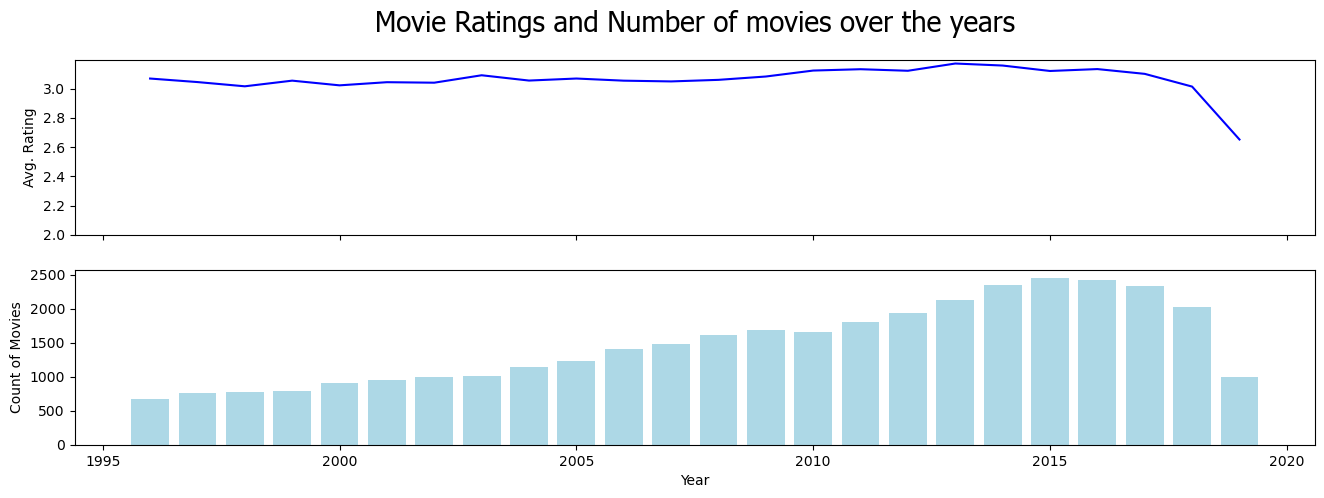

In [68]:
# plot graph keeping year scale common for rating and movie counts

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(16,5), sharex=True)

ax1.set_title('Movie Ratings and Number of movies over the years', loc = 'center' , pad = 20 , fontdict={'fontsize':20 , 'color' : 'Black', 
#                                                                                  'fontstyle' : 'italic',
                                                                                'fontfamily' : 'Tahoma'})
ax1.plot(x,y1,color='blue')
ax1.set_ylabel('Avg. Rating')
ax1.set_ylim(2,)

ax2.bar( x, y2.title.values,  color = 'lightblue', label=True )
ax2.set_ylabel('Count of Movies')
ax2.set_xlabel('Year')

plt.show()

###### The graph show that the number  of movies getting released have increased over the years. Comparatively, the annual average movie ratings for the year shows consistency until 2017 after which the ratings aggregate is sloping down for the subsequent years.

## View trends of movies released and when ratings are collected

/var/folders/19/78tzv11j6j1fvp85jc_fn1640000gn/T/ipykernel_39361/3766105749.py:20: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "-ro" (-> color='r'). The keyword argument will take precedence.



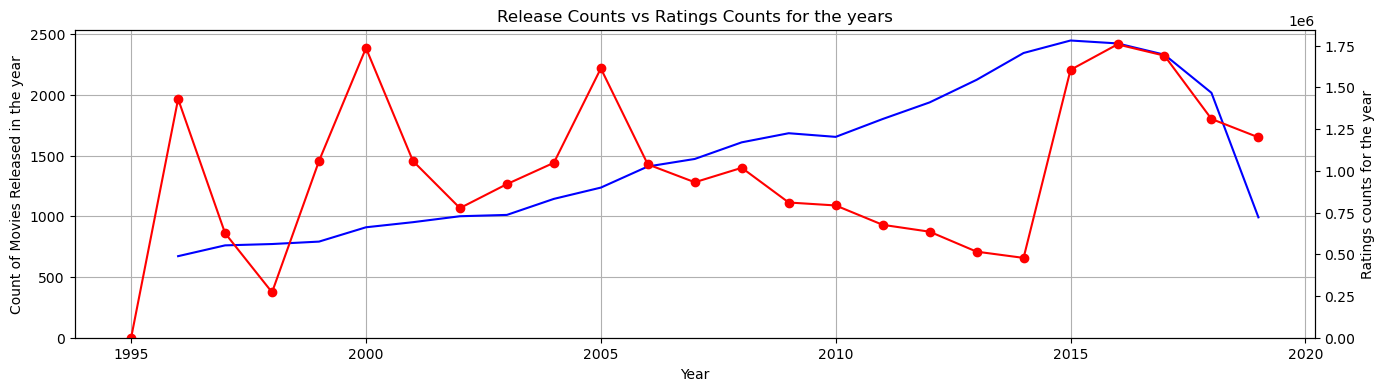

In [48]:
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s').dt.year
ratings_df.rename(columns={'timestamp' : 'ratings_year'} , inplace=True)

# Count of ratings collected per year
ratings_per_year = ratings_df[['ratings_year' , 'movieId']].groupby('ratings_year').count()

# plot commong graph keeping year scale common for rating and movie counts

fig, ax1 = plt.subplots(figsize=(16,4))

ax1.set_title('Release Counts vs Ratings Counts for the years')
ax1.plot(x,y2,color='Blue')
ax1.set_ylabel('Count of Movies Released in the year')
ax1.set_xlabel('Year')
ax1.grid(None)
ax1.set_ylim(0,)
# ax1.legend(True)

ax2 = ax1.twinx()
ax2.plot(ratings_per_year,'-ro' , color='red' )
ax2.set_ylabel('Ratings counts for the year')
ax2.set_ylim(0,)

plt.show()

###### The graph show that movies generation increase over years , while the Movie Ratting is wobbling

## Find Top 25 most rated movies of all time

In [49]:
# count of ratings
count_of_ratings = ratings_df[['movieId' , 'userId']].groupby('movieId').count()
count_of_ratings.rename(columns={'userId' : 'Count of Ratings'}, inplace=True)

# Joining count of ratings with movies names
# top 25 most rated movies of all time
movie_rating_counts = movies_df[['movieId','title']].merge(count_of_ratings, on='movieId')

movie_rating_counts.sort_values('Count of Ratings' , ascending=False)[:25] [['title' , 'Count of Ratings']]

title  Count of Ratings
351                                 Forrest Gump (1994)             81491
314                    Shawshank Redemption, The (1994)             81482
292                                 Pulp Fiction (1994)             79672
585                    Silence of the Lambs, The (1991)             74127
2480                                 Matrix, The (1999)             72674
257           Star Wars: Episode IV - A New Hope (1977)             68717
475                                Jurassic Park (1993)             64144
522                             Schindler's List (1993)             60411
108                                   Braveheart (1995)             59184
2867                                  Fight Club (1999)             58773
581                   Terminator 2: Judgment Day (1991)             57379
1166  Star Wars: Episode V - The Empire Strikes Back...             57361
0                                      Toy Story (1995)             57309
4887  Lord of the Rings: The Fellowship of the Ring,...             55736
49                           Usual Suspects, The (1995)             55366
1179  Star Wars: Episode VI - Return of the Jedi (1983)             54917
1168  Raiders of the Lost Ark (Indiana Jones and the...             54675
2766                             American Beauty (1999)             53689
840                               Godfather, The (1972)             52498
5840      Lord of the Rings: The Two Towers, The (2002)             51138
7028  Lord of the Rings: The Return of the King, The...             50797
46                          Seven (a.k.a. Se7en) (1995)             50596
452                                Fugitive, The (1993)             49638
1237                          Back to the Future (1985)             49595
764                Independence Day (a.k.a. ID4) (1996)             48902

## Top 10 highly rated movies of all time (that have atleast 5000 user ratings)

In [50]:
movies_df = movies_df.merge(movie_rating_counts[['movieId' , 'Count of Ratings']])

# top 10 all time highly rated movies -- min. 5000 user ratings available.
movies_df[movies_df['Count of Ratings'] > 5000].sort_values('rating', ascending=False) [:10]

movieId                                        title  \
314       318             Shawshank Redemption, The (1994)   
840       858                        Godfather, The (1972)   
49         50                   Usual Suspects, The (1995)   
1190     1221               Godfather: Part II, The (1974)   
1930     2019  Seven Samurai (Shichinin no samurai) (1954)   
522       527                      Schindler's List (1993)   
1173     1203                          12 Angry Men (1957)   
883       904                           Rear Window (1954)   
2867     2959                            Fight Club (1999)   
1164     1193       One Flew Over the Cuckoo's Nest (1975)   

                           genres                        genresList  year  \
314                   Crime|Drama                    [Crime, Drama]  1994   
840                   Crime|Drama                    [Crime, Drama]  1972   
49         Crime|Mystery|Thriller        [Crime, Mystery, Thriller]  1995   
1190                  Crime|Drama                    [Crime, Drama]  1974   
1930       Action|Adventure|Drama        [Action, Adventure, Drama]  1954   
522                     Drama|War                      [Drama, War]  1993   
1173                        Drama                           [Drama]  1957   
883              Mystery|Thriller               [Mystery, Thriller]  1954   
2867  Action|Crime|Drama|Thriller  [Action, Crime, Drama, Thriller]  1999   
1164                        Drama                           [Drama]  1975   

      rating  Count of Ratings  
314     4.41             81482  
840     4.32             52498  
49      4.28             55366  
1190    4.26             34188  
1930    4.25             13367  
522     4.25             60411  
1173    4.24             16569  
883     4.24             20162  
2867    4.23             58773  
1164    4.22             36058

## Find most common genre of the movies

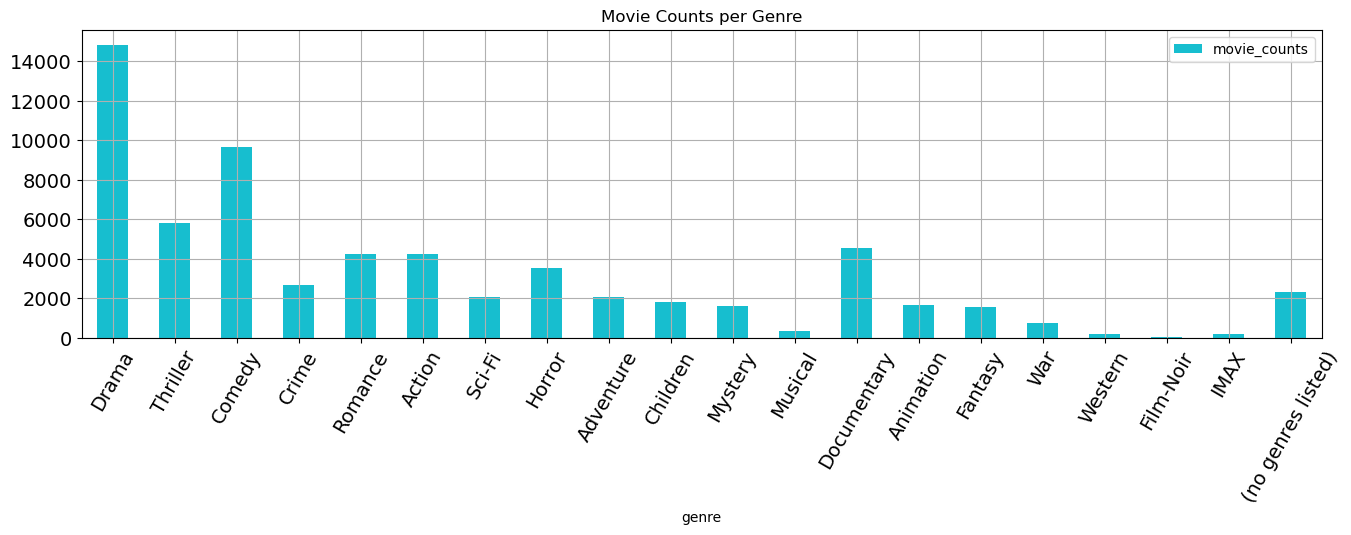

In [52]:
# Fetch unique list of genres available in the data  - total available genres 
unique_genre = pd.DataFrame(movies_after_1995['genres'].str.split(',').to_list()).stack().unique()

# number of movies per gneres
from collections import Counter

genres_counts = Counter(pd.DataFrame(movies_after_1995['genres'].str.split('|').to_list()).stack().to_list())

df = pd.DataFrame(genres_counts.items(), columns=['genre','movie_counts'])

bar_genres = df.plot.bar(x='genre' , rot = 60, figsize = (16,4), grid = True, 
                        colormap = 'tab10_r',
                         title='Movie Counts per Genre',
                         fontsize = 14,  )

###### The graph shows the number of movies made over the years specific to various genres. Drama , Thriller and Comedy are the most favorite genres for movie makers

## Find which genre performed better over the years

In [53]:
genre_filter = df.sort_values('movie_counts', ascending=False).head(7)['genre']
movies_genre = movies_after_1995.join(movies_after_1995['genres'].str.get_dummies().astype(bool))
movies_genre.drop('genres', axis = 1, inplace= True )

# making skeleton dataframe, with adding 'avg_rating' column for all the movies
df_new = movies_genre[['year', 'rating']].groupby('year').mean()
df_new.rename(columns = {'rating' : 'avg_rating'}, inplace=True)


# for loop to go over each genre and calculate genre specifc yearly average rating
for genre in genre_filter:
    df_tmp = movies_genre[movies_genre[genre]][['year', 'rating']].groupby('year').mean()
    df_new[genre] = df_tmp['rating']

df_new.fillna(method='ffill', inplace=True)    
df_new.head() 

avg_rating     Drama    Comedy  Thriller  Documentary   Romance  \
year                                                                    
1996    3.069345  3.253681  3.109393  2.938515     3.233571  3.274239   
1997    3.045191  3.141280  3.008017  2.975593     3.424583  3.124818   
1998    3.016153  3.129104  3.002203  2.881308     3.356607  3.136444   
1999    3.054874  3.145568  3.026346  2.950000     3.389804  3.050630   
2000    3.022747  3.122723  2.978862  2.854851     3.481410  3.127063   

        Action    Horror  
year                      
1996  2.908488  2.540270  
1997  2.857327  2.946977  
1998  2.801979  2.596500  
1999  2.860833  2.644386  
2000  2.842778  2.623846

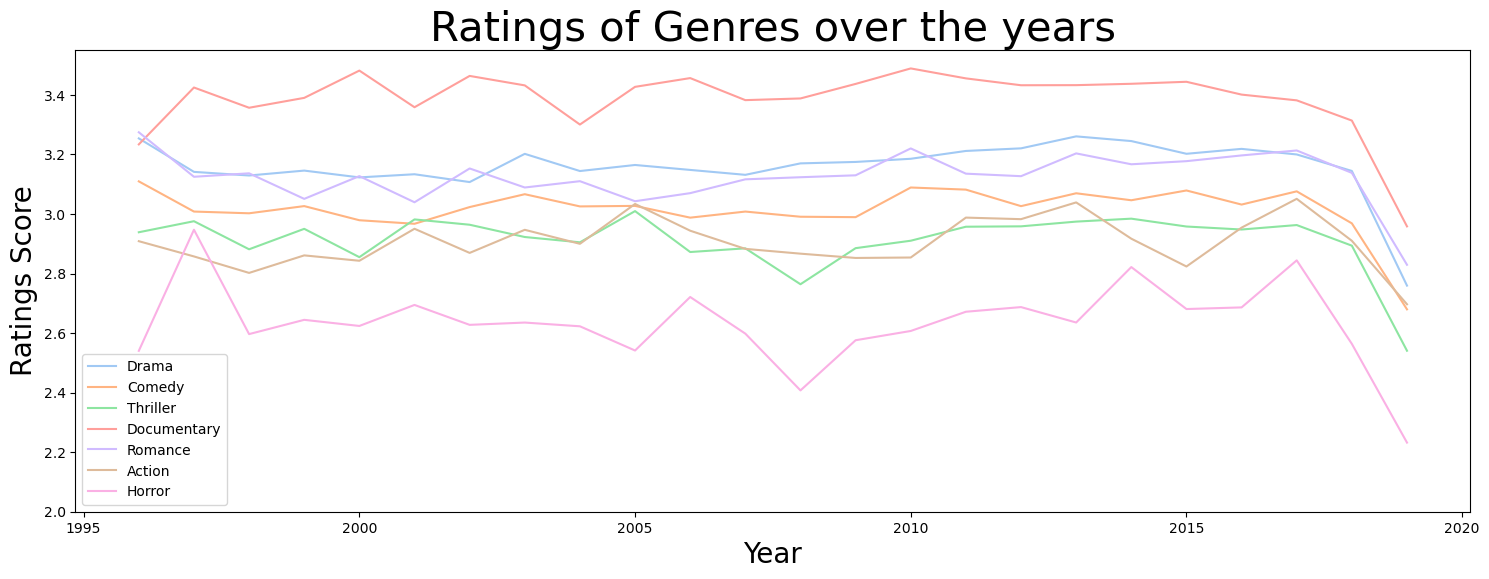

In [60]:
fig, ax = plt.subplots(figsize = (18,6), clear = True , facecolor = 'white')

sns.lineplot(data = df_new.loc[:,df_new.columns!='avg_rating'], 
             dashes = False, 
             legend='full',
             palette = 'pastel')


ax.set_ylabel('Ratings Score', fontdict={'fontsize' : 20, 'color' : 'Black'})
ax.set_xlabel('Year',fontdict={'fontsize' : 20, 'color' : 'Black'})
ax.set_ylim(2)
ax.set_title('Ratings of Genres over the years',fontdict={'fontsize' : 30 , 'color' : 'Black'})
ax.grid(False)

###### The graph shows that the highest rating score is for  documentary Movie genre

## Find which genres were rated the most

In [55]:
# bringing in 'count of Ratings' in the movie_genre data frame
movie_genre = movies_genre.merge(movies_df[['movieId' , 'Count of Ratings']] , left_on='movieId' 
                                 , right_on='movieId' , how='inner')

genre_list = movie_genre.columns[5:24]

genre_list

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War'],
      dtype='object')

In [56]:
   
rating_counts_per_genre = { x : movie_genre[movie_genre[x]]['Count of Ratings'].sum() for x in genre_list}

rating_counts_per_genre

{'(no genres listed)': 18543,
 'Action': 4483271,
 'Adventure': 3386793,
 'Animation': 1028557,
 'Children': 1030478,
 'Comedy': 4799672,
 'Crime': 2286680,
 'Documentary': 245658,
 'Drama': 6085463,
 'Fantasy': 1622120,
 'Film-Noir': 98709,
 'Horror': 994271,
 'IMAX': 935831,
 'Musical': 294252,
 'Mystery': 1271166,
 'Romance': 2443863,
 'Sci-Fi': 2536832,
 'Thriller': 4181295,
 'War': 525373}

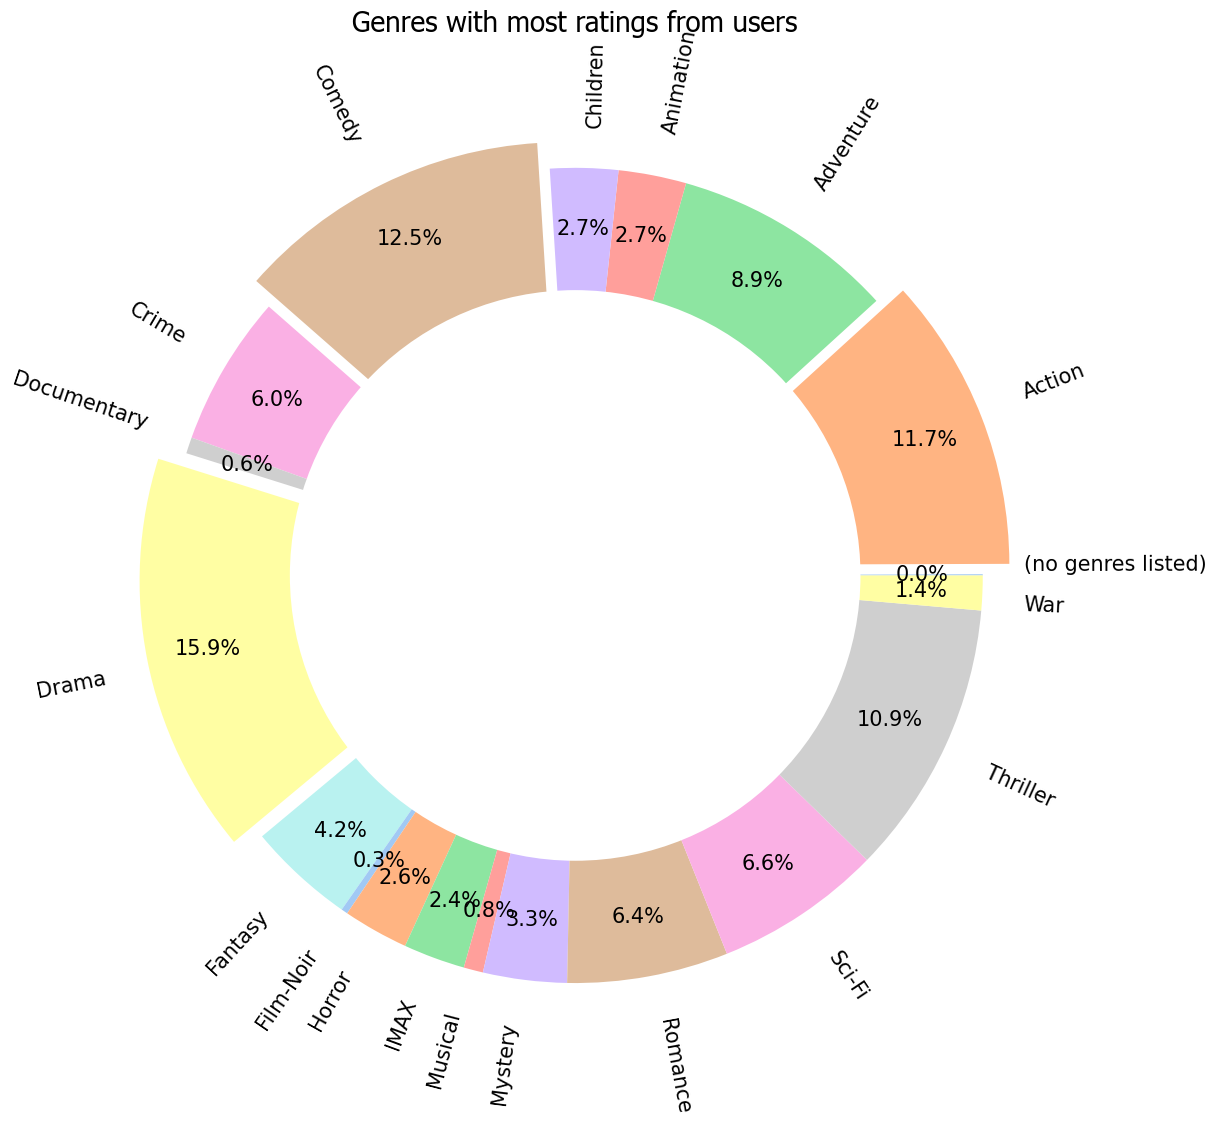

In [58]:
from collections import Counter

pie1_lables = rating_counts_per_genre.keys()

c = Counter(rating_counts_per_genre)
top_3_values = [x[0] for x in c.most_common(3)]

# explode only the top 3 categories
expand_list = [ 0.07 if x in top_3_values else 0  for x in pie1_lables ]

cmap = sns.color_palette(palette='pastel')
    

pie1, ax1 = plt.subplots(figsize = (12,12))


plt.pie(x = rating_counts_per_genre.values() ,  labels=pie1_lables , 
        explode=expand_list, 
        textprops={'fontsize':15, 'color':'black'}, autopct='%.1f%%',
        rotatelabels = True ,
        pctdistance=0.85, 
        colors = cmap,
#         startangle=40
       )

center_circle = plt.Circle((0,0) , 0.7 , fc = 'white')
fig = plt.gcf()
plt.gca().add_artist(center_circle)
plt.title('Genres with most ratings from users', loc = 'center' , pad = 50 , fontdict={'fontsize':20 , 'color' : 'Black', 
#                                                                                  'fontstyle' : 'italic',
                                                                                'fontfamily' : 'Tahoma'})

plt.axis('equal')
plt.show()

###### The graph show that   Drama, Comedy and Action are the top 3 genres for which users have shared most of the ratings.

## Rating Ranges Per Movies genres

In [90]:
df1 = ratings.copy()

df3 = movies.copy()


In [91]:
# seperate year from title
#seperate genre in each colum

#add year from title feature
ss = df3['title'].str.findall('\((\d{4})\)').str.get(0)
df3['Year'] = ss

#seperate genre for each movie and count genres
sss = df3['genres'].str.split(pat='|', expand=True).fillna(0)
sss.columns = ['genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre8', 'genre9', 'genre10']
cols = sss.columns
sss[cols] = sss[cols].astype('category')
ss1 = sss.copy()
cat_columns = ss1.select_dtypes(['category']).columns

#count genres (non zeros)
ss1[cat_columns] = ss1[cat_columns].apply(lambda x: x.cat.codes)
ss1['genre_count'] = ss1[cols].gt(0).sum(axis=1) #count greater than 0 values for less than: df[cols].lt(0).sum(axis=1), for equal==0: df[cols].eq(0).sum(axis=1)

#assigning everything to same dataframe
df3['genre_count'] = ss1['genre_count']
df3[cols] = sss[cols]

df3.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  Year  genre_count     genre1  \
0  Adventure|Animation|Children|Comedy|Fantasy  1995            5  Adventure   
1                   Adventure|Children|Fantasy  1995            3  Adventure   
2                               Comedy|Romance  1995            2     Comedy   
3                         Comedy|Drama|Romance  1995            3     Comedy   
4                                       Comedy  1995            1     Comedy   

      genre2    genre3  genre4   genre5 genre6 genre7 genre8 genre9 genre10  
0  Animation  Children  Comedy  Fantasy      0      0      0      0       0  
1   Children   Fantasy       0        0      0      0      0      0       0  
2    Romance         0       0        0      0      0      0      0       0  
3      Drama   Romance       0        0      0      0      0      0       0  
4          0         0       0        0      0      0      0      0       0

In [92]:
#avg movie ratings by movied id and count
#avg movie ratings by user id and count
rating_avg = df1.groupby('movieId')['rating'].mean().reset_index()
rating_avg = pd.DataFrame(rating_avg)

rating_count = df1.groupby('movieId')['rating'].count().reset_index()
rating_count = pd.DataFrame(rating_count)
rating_count.rename({'rating': 'rating_count'}, axis=1, inplace=True)

user_rating = df1.groupby('userId')['rating'].mean().reset_index()
user_rating = pd.DataFrame(user_rating)

user_count = df1.groupby('userId')['rating'].count().reset_index()
user_count = pd.DataFrame(user_count)
user_count.rename({'rating': 'rating_count'}, axis=1, inplace=True)

df_movie = rating_avg.merge(rating_count, on = 'movieId', how='inner')

df_user = user_rating.merge(user_count, on = 'userId', how='inner')

In [93]:
df_user.head() #avg rating given by a user and its count

userId    rating  rating_count
0       1  3.814286            70
1       2  3.630435           184
2       3  3.697409           656
3       4  3.378099           242
4       5  3.752475           101

In [94]:
df_movie.head() #avg rating on a movie and count

movieId    rating  rating_count
0        1  3.893708         57309
1        2  3.251527         24228
2        3  3.142028         11804
3        4  2.853547          2523
4        5  3.058434         11714

In [95]:
df3 = df3.merge(df_movie, on = 'movieId', how='inner')
df3.rename({'rating': 'avg_rating'}, axis=1, inplace=True)
df3.head(3)

movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   

                                        genres  Year  genre_count     genre1  \
0  Adventure|Animation|Children|Comedy|Fantasy  1995            5  Adventure   
1                   Adventure|Children|Fantasy  1995            3  Adventure   
2                               Comedy|Romance  1995            2     Comedy   

      genre2    genre3  genre4   genre5 genre6 genre7 genre8 genre9 genre10  \
0  Animation  Children  Comedy  Fantasy      0      0      0      0       0   
1   Children   Fantasy       0        0      0      0      0      0       0   
2    Romance         0       0        0      0      0      0      0       0   

   avg_rating  rating_count  
0    3.893708         57309  
1    3.251527         24228  
2    3.142028         11804

In [96]:
df3.describe()

movieId   genre_count    avg_rating  rating_count
count   59047.000000  59047.000000  59047.000000  59047.000000
mean   120692.748065      1.733704      3.071374    423.393144
std     64452.508194      1.066425      0.739840   2477.885821
min         1.000000      0.000000      0.500000      1.000000
25%     78277.000000      1.000000      2.687500      2.000000
50%    136782.000000      2.000000      3.150000      6.000000
75%    173812.000000      2.000000      3.500000     36.000000
max    209171.000000     10.000000      5.000000  81491.000000

In [97]:
df3.describe(include=[object, 'category'])

title genres   Year genre1  genre2  genre3  genre4  genre5  \
count             59047  59047  58675  59047   59047   59047   59047   59047   
unique            58958   1621    135     20      19      18      17      14   
top     Blackout (2007)  Drama   2015  Drama       0       0       0       0   
freq                  2   8637   2449  14624   28670   46042   55532   58235   

        genre6  genre7  genre8  genre9  genre10  
count    59047   59047   59047   59047    59047  
unique      12       9       4       2        2  
top          0       0       0       0        0  
freq     58897   59020   59044   59046    59046

In [98]:
df_user.describe()

userId         rating   rating_count
count  162541.00000  162541.000000  162541.000000
mean    81271.00000       3.679205     153.807932
std     46921.68939       0.477368     268.047590
min         1.00000       0.500000      20.000000
25%     40636.00000       3.398747      36.000000
50%     81271.00000       3.700000      71.000000
75%    121906.00000       4.000000     162.000000
max    162541.00000       5.000000   32202.000000

In [99]:
cols = ['movieId', 'genre1']
b1 = df3[cols]
box_genre = df1.merge(b1, on='movieId', how='inner')

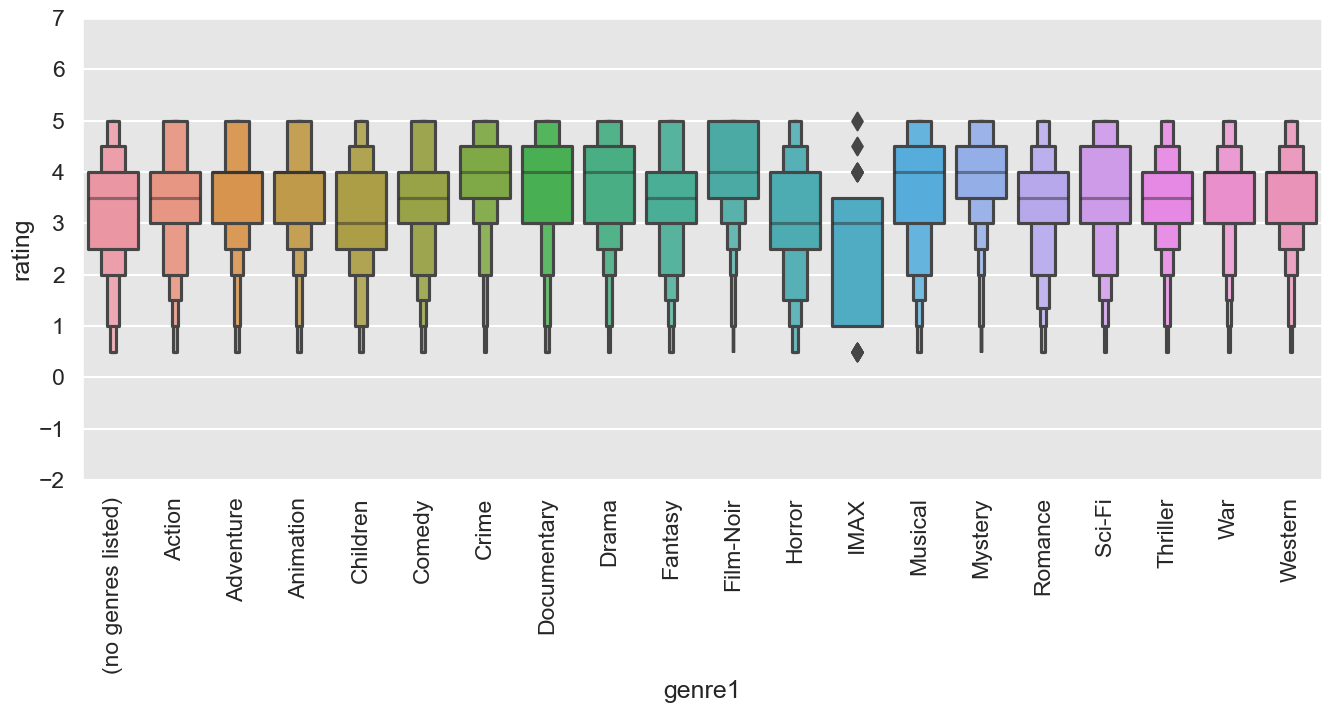

In [103]:
sns.set(rc={'figure.figsize':(16, 6)})
sns.set_context("talk")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.boxenplot(x=box_genre.genre1, y=box_genre.rating, data=box_genre)
plt.xticks(rotation=90)
plt.ylim(-2, 7)
plt.title='Rating Ranges Per Movies genres'

###### The graph show that Rating Ranges Movies genres is between .5 and 5, while Rating distribution is different between genres

# Features Enginering 

###### Below Features are generated during  the EDA:
1- Movie Production Year
2- Movie Average Ratting
3- Movie Ratting Count 

# Summary

###### Below Points Summarize our Finding in EDA

1-Most user has given a rating of movies between 3 to 5. 2-No rating in 1995 Year, Also we have a difference in rating count between years. 3-There is a same rating behavior over months. 4-Number of movies made over the years specific to various genres. Drama , Thriller and Comedy are the most favorite genres for movie makers. 5-The number of movies increases over years till 2017 and then start deceasing. 6-Number of movies getting released have increased over the years. Comparatively, the annual average movie ratings for the year shows consistency until 2017 after which the ratings aggregate is sloping down for the subsequent years. 7- The highest rating score is for documentary Movie genre. 8- Drama, Comedy and Action are the top 3 genres for which users have shared most of the ratings. 9- Rating Ranges Movies genres is between .5 and 5, while Rating distribution is different between genres.

# Data Chalenges And Propose Solutions

###### During EDA we found below data chalenges 

Data sparse: Ratings are very sparse and data points are mostly collected from very popular movies and highly engaged users. We wouldn’t want movies that were rated by a small number of users because it’s not credible enough. Similarly, users who have rated only a handful of movies should also not be taken into account. So we will reduce the sparce/noise  by adding some filters for the final dataset.
A- To qualify a movie, a minimum of [Configurable Parameter ] users should have voted a movie.
B- To qualify a user, a minimum of [Configurable Parameter ] movies should have voted by the user.


Cold Start Problems: situations where encounter new users or movies without a history. we will handle it as below:
A- For new users: 
1- Top 10 Movies will be recommendations.
2- Top 10 Movies for a selected Movie genre
B- For new movies,
Movie genre will be used to recommend it to target users.





